<a href="https://colab.research.google.com/github/namozhdehi/Pathrise/blob/main/03_EDA_Pathrise_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 Exploratory Data Analysis (EDA) <a id='2_EDA'></a>

3.1 Contents <a id='2.1_Contents'></a>

[3. Exploratory Data Analysis (EDA)](#2_Data_wrangling)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.1_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.3 Load Data](#3.4_Load_Data)
  * [3.5 Basic Statistics and Data Types](#3.5_Basic_Stats)
  * [3.6 Class Distribution](#3.6_Class_Distribution)
  * [3.7 Word Cloud for Conversations](#3.7_Word_Cloud)
  * [3.8 Relationships Between Features](#3.8_Relationships)
  * [3.9 Correlation Matrix](#3.9_Correlation_Matrix)
  * [3.10 Summary](#3.9_Summary)  

## 2.2 Introduction <a id='2.2_Introduction'></a>

In this notebook, we will conduct Exploratory Data Analysis (EDA) on the Pathrise dataset to understand its structure, distribution, and key patterns. The aim of the EDA is to uncover insights about participants' job search experiences, challenges, and outcomes, which will help us build an effective chatbot for career guidance. We will explore basic statistics, class distributions, relationships between features, and key text data from the biggest_challenge_in_search column.

## 2.3 Imports <a id='2.3_Imports'></a>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from imblearn.over_sampling import SMOTE
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 2.4 Load Data <a id='2.4_Load_Data'></a>

In [2]:
# Load the cleaned data from CSV file
df = pd.read_csv('pathrise_cleaned_data.csv')

# Display the first few rows of the DataFrame
df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race,cleaned_biggest_challenge_in_search
0,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American,figuring jobs apply
1,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify,getting past final round interviews
2,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American,hearing back applications
3,6,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American,technical interviewing
4,7,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American",getting past phone screens


## 2.5 Basic Statistics and Data Types <a id='2.5_Basic_Stats'></a>

We begin by examining the basic structure of the dataset, including data types and descriptive statistics for numerical columns.

In [3]:
# Display data types of each column
print(df.dtypes)

# Get descriptive statistics of numerical columns
df.describe(include=[np.number])

id                                       int64
pathrise_status                         object
primary_track                           object
cohort_tag                              object
program_duration_days                  float64
placed                                   int64
employment_status                       object
highest_level_of_education              object
length_of_job_search                    object
biggest_challenge_in_search             object
professional_experience                 object
work_authorization_status               object
number_of_interviews                   float64
number_of_applications                   int64
gender                                  object
race                                    object
cleaned_biggest_challenge_in_search     object
dtype: object


,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,988.000000,988.000000,988.000000,988.000000,988.000000
mean,1110.110324,132.705466,0.507085,2.256073,38.044534
std,736.628258,125.864586,0.500203,3.042125,48.302492
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,468.500000,14.000000,0.000000,0.000000,9.000000
50%,993.000000,107.000000,1.000000,1.000000,25.000000
75%,1741.500000,220.250000,1.000000,4.000000,50.000000
max,2544.000000,548.000000,1.000000,20.000000,500.000000


## 2.6 Class Distribution <a id='2.6_Class_Distribution'></a>

Understanding the distribution of categorical variables such as employment_status and primary_track is essential for identifying patterns in the dataset.

### 2.6.1 Employment Status Distribution

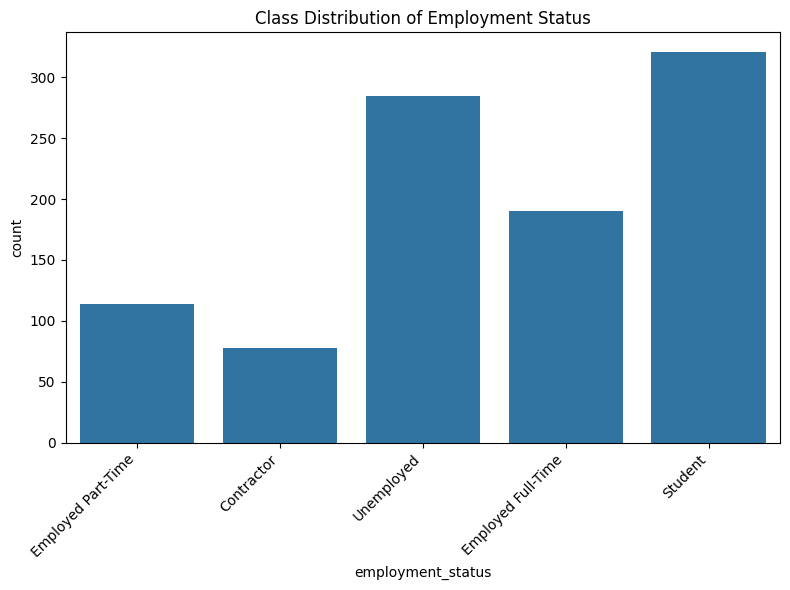

In [4]:
# Plot the class distribution for employment status
plt.figure(figsize=(8, 6))
sns.countplot(x='employment_status', data=df)
plt.title('Class Distribution of Employment Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2.6.2 Primary Track Distribution

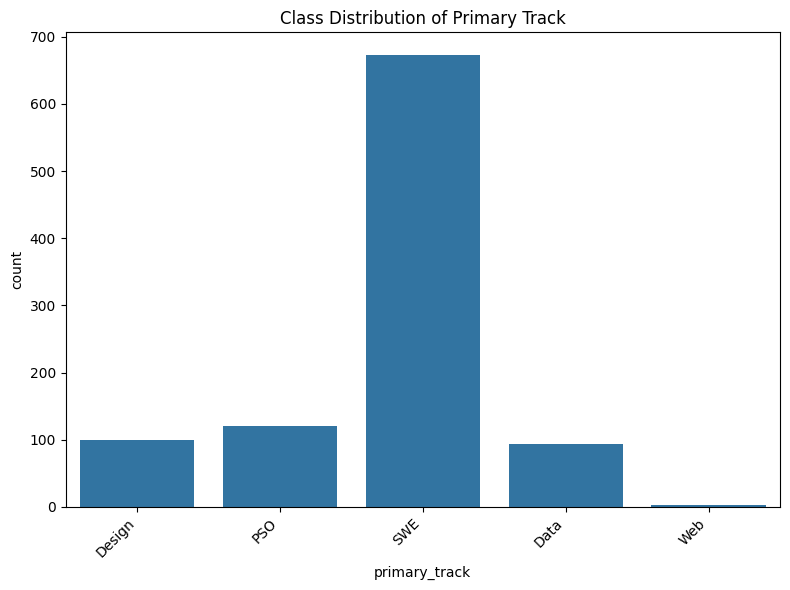

In [5]:
# Plot class distribution of primary track
plt.figure(figsize=(8, 6))
sns.countplot(x='primary_track', data=df)
plt.title('Class Distribution of Primary Track')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- **Employment status**: The most common employment status is 'Student', followed by 'Unemployed', while 'Contractor' is the least common.
- **Primary track**: Tracks like SWE (Software Engineering) and PSO (Product Support Operations) may be more common in the dataset.

## 2.7 Word Cloud for Conversations <a id='2.7_Word_Cloud'></a>

To explore the key themes and topics in the biggest_challenge_in_search column, we can generate a word cloud of the most frequent words in these job search challenges.

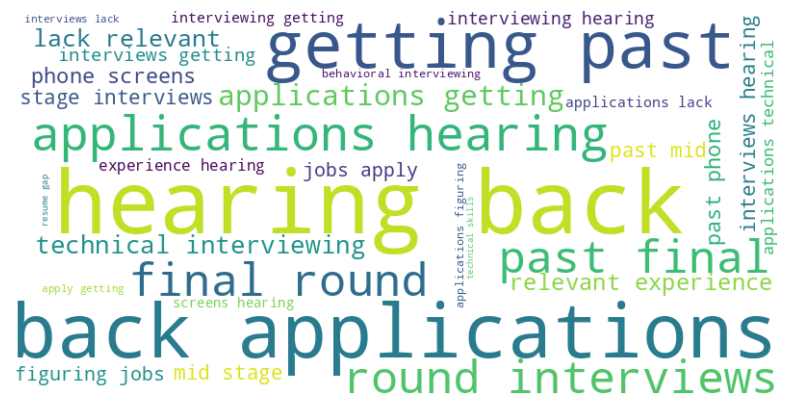

In [6]:
# Create a word cloud for the 'cleaned_biggest_challenge_in_search' column
text = ' '.join(df['cleaned_biggest_challenge_in_search'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The most frequent words in the biggest_challenge_in_search conversations are related to 'applications', 'hearing back', and 'getting past' various interview stages, highlighting common job search challenges.

## 2.8 Relationships Between Features <a id='2.8_Relationships'></a>

Exploring relationships between features such as employment_status and numerical columns like number_of_applications and length_of_job_search helps uncover key patterns.

### 2.8.1 Relationship Between Number of Applications and Employment Status

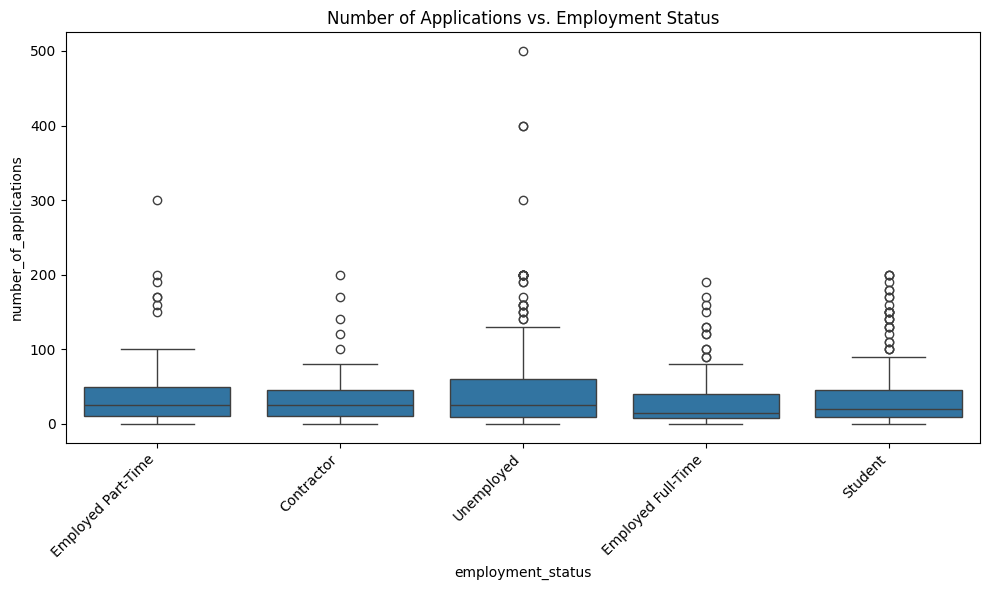

In [7]:
# Plot the relationship between number of applications and employment status
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_status', y='number_of_applications', data=df)
plt.title('Number of Applications vs. Employment Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2.8.2 Relationship Between Length of Job Search and Employment Status

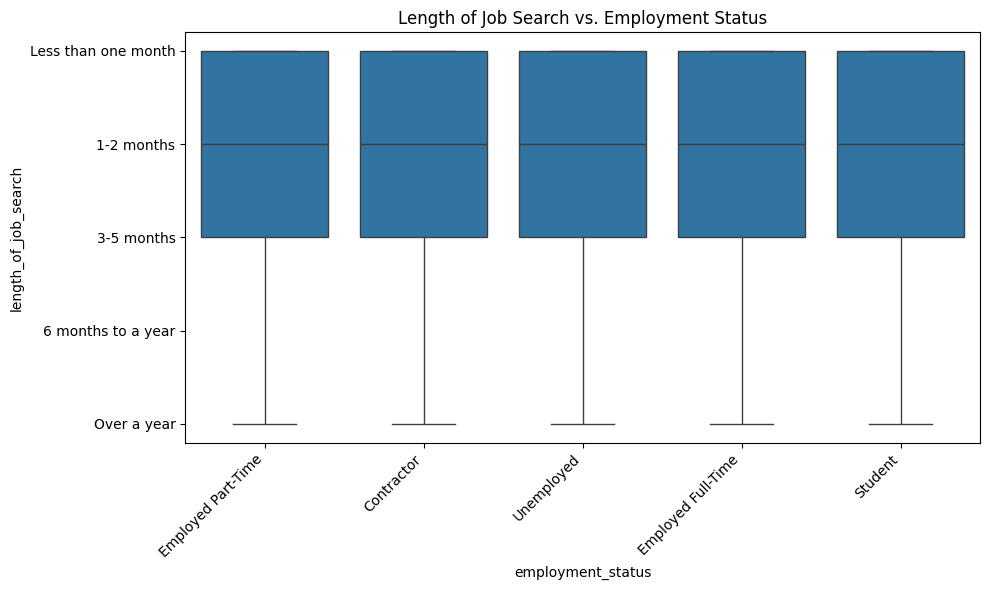

In [8]:
# Plot the relationship between length of job search and employment status
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_status', y='length_of_job_search', data=df)
plt.title('Length of Job Search vs. Employment Status')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This allows us to identify whether people who apply to more jobs are more likely to be employed, and if the length of the job search impacts employment outcomes.

## 2.9 Correlation Matrix <a id='2.9_Correlation_Matrix'></a>

Lastly, we examine the correlation between numerical columns such as number_of_applications, number_of_interviews, and program_duration_days to see if any strong relationships exist.

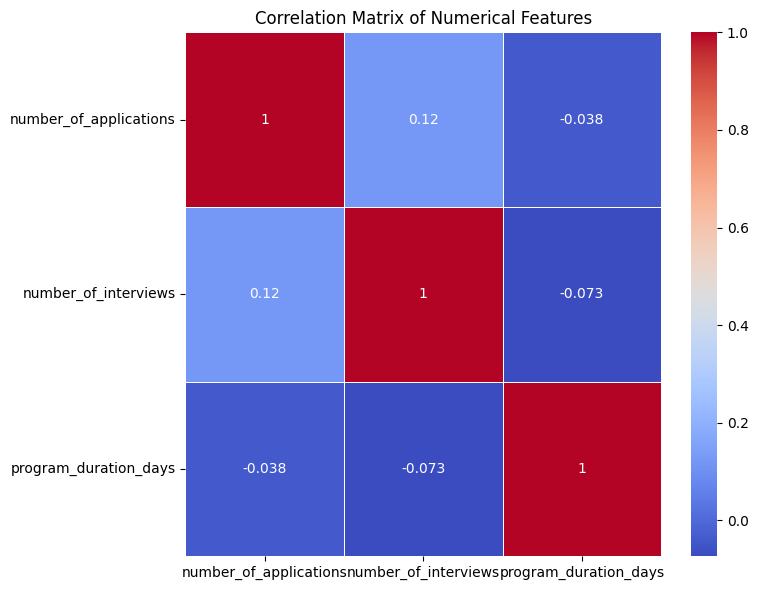

In [9]:
# Calculate correlation matrix
corr_matrix = df[['number_of_applications', 'number_of_interviews', 'program_duration_days']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

This heatmap will highlight any strong correlations between features. For instance, participants who apply for more jobs might tend to have more interviews, or longer program durations may correlate with more interviews.

## 2.10 Summary

Class Distributions: The distribution of employment statuses and primary tracks provides key insights into the makeup of the dataset.
Text Data: The analysis of biggest_challenge_in_search reveals common difficulties in job searches, including issues with applications and interview rounds.
Relationships Between Features: Numerical data analysis uncovers relationships between job applications, length of job search, and employment outcomes.
Correlation Matrix: The correlation matrix helps us understand how different numerical features are related, potentially informing feature selection for modeling.
This EDA gives us a solid understanding of the Pathrise dataset and prepares us for the next step of building a model for the chatbot.